# 1. IMPORT AND EXPLORE THE DATA

**IMPORTING REQUIRED LIBRARIES**

In [1]:
!pip install stats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24284 sha256=4afc56215917c7bd11d36de9cad78a5ec8dda0ab4ef1e7107c4f28561c6bd73e
  Stored in directory: /root/.cache/pip/wheels/c9/85/bc/3371b9bce1e4f7b8b638e8c968a4dbd74db171ee180c48f808
Successfully built stats


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import stats
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

**READING THE DATA CSV FILE**

In [3]:
data=pd.read_csv('/content/signal-data.csv') #original dataframe

**COPYING THE DATA**

In [4]:
data_copy=data.copy() # a deepcopy of the original dataframe

**EXPLORING SHAPE OF THE DATA  AND FEATURES IN THE DATA**

In [ ]:
print(' shape of the data is :',data_copy.shape)

 shape of the data is : (1567, 592)


1567 rows and 592 columns

In [ ]:
data_copy.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

*we have total of 592 columns  and 1567 rows*

**FINDING DATATYPES**

In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [ ]:
data_copy.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

Findings :

1. the feature **'Time'** is  **object datatype**

2. the independent feature **'Pass/Fail'** is an  **int64 datatype**

3. all other features ranging from **0 to 589** comes under **float64 datatype**

**TOTAL NULLVALUES IN DATA**

In [ ]:
print('Total null values in data are : ',data_copy.isna().sum().sum())

Total null values in data are :  41951


**SUMMARY STATISTICS OF THE DATA**

In [ ]:
summary_statistics = data_copy.describe()
summary_statistics


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [ ]:
print('unique values in target variable :', data_copy['Pass/Fail'].nunique())
print('No of nullvalues in taraget variable :', data_copy['Pass/Fail'].isna().sum())

unique values in target variable : 2
No of nullvalues in taraget variable : 0


**INFERENCE :**

1. Data have 1 object datatype - **Time** , 1 int(64) datatype -**Pass/Fail**(target variable) and 590 float64 datatype **(0 to 589)** .

1. We can drop **Time** feature since its not required for the analysis .

2. Target variable **(Pass/Fail)** has no nullvalues so, we can put it aside till model building .

4. There are total **41,951** nullvalues in the data.

4. We can observe feature named **5** has all values as 100 with 14 nullvalues .This feature cannot explain any variability in the target variable . so we can remove constant features  like these in the following feature selection process.

# 2.DATA CLEANSING



*   **Removing the 'Time' and dependent ('Pass/Fail') features**




In [ ]:
df= data_copy.drop(columns=[data_copy.columns[0], data_copy.columns[-1]])
df.shape

(1567, 590)



*   **Lets find number of missing values in each feature :**



In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
0,6
1,7
2,14
3,14
4,14
5,14
6,14
7,9
8,2
9,2


* **Lets find out the missing percentage in each feature**




In [ ]:
missing_columns = missing_values[missing_values > 0]
missing_percentage = (missing_columns / df.shape[0]) * 100
missing_percentage

,0
0,0.382897
1,0.446713
2,0.893427
3,0.893427
4,0.893427
5,0.893427
6,0.893427
7,0.574346
8,0.127632
9,0.127632


**INFERENCE :**

* Total Null values in the entire dataset  are : **41951**







* Most of the features have less number of null values but **28** features have greater than **50%** of null values . They are :
  1. ***12*** Features (109-111 , 244-246 , 516-518 , 382-384 ) have **1018**
null values each, which is **64.9%** of particular feature values .

  2. ***4***  Features (85 , 220 , 358 , 492) have **1341** nullvalues each  , which is **85.5%** of particular feature values .

  3.  ***4***   Features(157 , 158 ,  292, 293)  have **1429**   null values each , which is **91%** of particular feature values .
  4. ***4***  Features (578-581) have **949** null values each , which is **60.5%** of particular feature values .
  4. ***4***  Features (72, 73, 345, 346) have **794** null values each , which is **50.6%** of particular feature values .


* Features without  nullvalues - 113 to 117, 119, 120, 156, 221 to 223, 248, 252, 254, 255, 359 to 361 , 386 to 390 , 392, 293 , 429, 494, 495 , 520 to 524 , 526, 527.



*   **LETS DROP FEATURES HAVING GREATER THAN OR EQUAL TO 70% OF NULLVALUES**



In [ ]:
df.shape


(1567, 590)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 590 entries, 0 to 589
dtypes: float64(590)
memory usage: 7.1 MB


In [ ]:
columns_to_drop=missing_percentage[missing_percentage >= 70].index
print('Dropping ',len(columns_to_drop),'columns having >=70% nullvalues . those columns are :',columns_to_drop) #28 columns have grater than 50% missing values

Dropping  8 columns having >=70% nullvalues . those columns are : Index(['85', '157', '158', '220', '292', '293', '358', '492'], dtype='object')


In [ ]:
df_dropped_nullvalues=df.drop(columns=columns_to_drop)

In [ ]:
df_dropped_nullvalues.shape

(1567, 582)

In [ ]:
df_dropped_nullvalues.isna().sum().sum()

30871

In [ ]:
df_imputed = df_dropped_nullvalues.fillna(df_dropped_nullvalues.mean())

In [ ]:
df_imputed.isna().sum().sum()

0

In [ ]:
df_imputed.shape

(1567, 582)

In [ ]:
duplicates = df_imputed.duplicated().sum()  #checking if there are any duplicate rows(records)
print(f'Total duplicate rows: {duplicates}')


Total duplicate rows: 0


In [ ]:

# Initialize a list to store the summary for each column
summary_list = []

for col in df_imputed.columns:
    Q1 = df_imputed[col].quantile(0.25)
    Q3 = df_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_imputed[(df_imputed[col] < lower_bound) | (df_imputed[col] > upper_bound)]
    summary_list.append({
        'Column': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': len(outliers)
    })

# Convert the list to a DataFrame
summary = pd.DataFrame(summary_list)




In [ ]:
summary

,Column,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count
0,0,2966.66500,3056.54000,89.87500,2831.852500,3191.352500,51
1,1,2452.88500,2538.74500,85.86000,2324.095000,2667.535000,87
2,2,2181.09995,2218.05550,36.95555,2125.666625,2273.488825,31
3,3,1083.88580,1590.16990,506.28410,324.459650,2349.596050,51
4,4,1.01770,1.52960,0.51190,0.249850,2.297450,62
...,...,...,...,...,...,...,...
577,585,2.30650,3.29495,0.98845,0.823825,4.777625,78
578,586,0.01345,0.02760,0.01415,-0.007775,0.048825,32
579,587,0.01060,0.02030,0.00970,-0.003950,0.034850,60
580,588,0.00330,0.00640,0.00310,-0.001350,0.011050,65


In [ ]:
def cap_outliers(df, multiplier=1.5):
    df_capped = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped




In [ ]:
df_capped = cap_outliers(df_imputed, multiplier=2.0)

In [ ]:
df_capped.isna().sum().sum()

0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the directory where you want to save the plots
save_directory = r"C:\Users\MAHEEDHAR\OneDrive\Desktop\CORIZOMAJORPROJECT\boxplots"

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Loop through the columns and save the plots
for col in df_capped.columns:
    try:
        plt.figure(figsize=(10, 6))
        sns.boxplot(df_capped[col])
        plt.title(f'Boxplot of {col}')

        # Save the plot to the specified directory
        save_path = os.path.join(save_directory, f'{col}_boxplot.png')
        plt.savefig(save_path)
        plt.close()
        print(f'Saved: {save_path}')
    except Exception as e:
        print(f'Error saving plot for column {col}: {e}')


Saved: C:\Users\MAHEEDHAR\OneDrive\Desktop\CORIZOMAJORPROJECT\boxplots/0_boxplot.png
Saved: C:\Users\MAHEEDHAR\OneDrive\Desktop\CORIZOMAJORPROJECT\boxplots/1_boxplot.png
Saved: C:\Users\MAHEEDHAR\OneDrive\Desktop\CORIZOMAJORPROJECT\boxplots/2_boxplot.png
Saved: C:\Users\MAHEEDHAR\OneDrive\Desktop\CORIZOMAJORPROJECT\boxplots/3_boxplot.png
Saved: C:\Users\MAHEEDHAR\OneDrive\Desktop\CORIZOMAJORPROJECT\boxplots/4_boxplot.png
Saved: C:\Users\MAHEEDHAR\OneDrive\Desktop\CORIZOMAJORPROJECT\boxplots/5_boxplot.png
Saved: C:\Users\MAHEEDHAR\OneDrive\Desktop\CORIZOMAJORPROJECT\boxplots/6_boxplot.png
Saved: C:\Users\MAHEEDHAR\OneDrive\Desktop\CORIZOMAJORPROJECT\boxplots/7_boxplot.png
Saved: C:\Users\MAHEEDHAR\OneDrive\Desktop\CORIZOMAJORPROJECT\boxplots/8_boxplot.png
Saved: C:\Users\MAHEEDHAR\OneDrive\Desktop\CORIZOMAJORPROJECT\boxplots/9_boxplot.png
Saved: C:\Users\MAHEEDHAR\OneDrive\Desktop\CORIZOMAJORPROJECT\boxplots/10_boxplot.png
Saved: C:\Users\MAHEEDHAR\OneDrive\Desktop\CORIZOMAJORPROJECT\bo

In [ ]:
import shutil

# Define the directory where the files are saved
save_directory = r"/content/C:\Users\MAHEEDHAR\OneDrive\Desktop\CORIZOMAJORPROJECT\boxplots"

# Define the name of the zip file
zip_file_name = "boxplots"

# Zip the files
shutil.make_archive(zip_file_name, 'zip', save_directory)

print(f'Files zipped successfully at {zip_file_name}')

from google.colab import files

# Download the zip file
files.download(zip_file_name)


Files zipped successfully at boxplots


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CHECKING SKEWNESS AFTER CAPPING OUTLIERS AND APPLYING LOG TRANSFORMATION

# 3. DATA ANALYSIS AND VISUALIZATION

STATISTICAL ANALYSIS

In [ ]:
# # Summary statistics
# summary_statistics = df_reduced.describe()
# summary_statistics

In [ ]:
# import matplotlib.pyplot as plt

# # Histograms for each feature
# df_reduced.hist(bins=30, figsize=(20, 15))
# plt.suptitle('Histogram of All Features After Transformations')
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Histograms for each feature
# df_reduced.hist(bins=30, figsize=(20, 15))
# plt.suptitle('Histogram of All Features After Transformations')
# plt.show()

# # Box plots for each feature
# df_reduced.plot(kind='box', subplots=True, layout=(20, 22), figsize=(20, 15), sharex=False, sharey=False)
# plt.suptitle('Box Plot of All Features After Transformations')
# plt.show()


In [ ]:
# # Define the number of rows and columns for the subplot grid
# num_features = 20
# num_rows = 5
# num_cols = 4

# # Create a figure with subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
# fig.suptitle('Distribution Plots of the First 20 Features', fontsize=16)

# # Loop through each feature and plot the distplot in the corresponding subplot
# for i, column in enumerate(df_reduced.columns[:num_features]):
#     row = i // num_cols
#     col = i % num_cols
#     sns.histplot(df_reduced[column], bins=30, kde=True, ax=axes[row, col])
#     axes[row, col].set_title(f'Feature {column}')

# # Adjust the layout
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()




**BIVARIATE ANALYSIS :**

In [ ]:


# # Correlation matrix
# corr_matrix = df_reduced.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
# plt.title('Correlation Matrix After Transformations')
# plt.show()


In [ ]:
# # Scatter plots for each feature against the target variable
# for column in df_reduced.columns:
#     plt.figure()
#     sns.scatterplot(x=df_reduced[column], y=data_copy['Pass/Fail'])
#     plt.title(f'Scatter Plot of {column} vs Pass/Fail After Transformations')
#     plt.show()


In [ ]:


# # Number of features to plot
# num_features = 20

# # Create a figure with subplots
# num_rows = 5
# num_cols = 4
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
# fig.suptitle('Box Plots of Features Against Pass/Fail', fontsize=16)

# # Loop through each feature and plot the box plot in the corresponding subplot
# for i, column in enumerate(df_reduced.columns[:num_features]):
#     row = i // num_cols
#     col = i % num_cols
#     sns.boxplot(x=data_copy['Pass/Fail'], y=df_reduced[column], ax=axes[row, col])
#     axes[row, col].set_title(f'Feature {column}')

# # Adjust the layout
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()


**MULTIVARIATE ANALYSIS**


In [ ]:


# # Pair plots for a subset of features
# sns.pairplot(df_reduced.iloc[:, :10])  # Adjust the number of features as needed
# plt.suptitle('Pair Plot of Features')
# plt.show()


AS WE CAN SEE THERE IS NO CORRELATION BETWEEN THE FEATURES

In [ ]:
# # Correlation matrix
# corr_matrix = df_reduced.corr()

# # Plot heatmap of the correlation matrix
# plt.figure(figsize=(20, 15))
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
# plt.title('Heatmap of Feature Correlations')
# plt.show()


# 4. DATA-PREPROCESSING

In [ ]:
df_capped.isna().sum().sum()

0

In [ ]:
df_capped.shape

(1567, 582)

In [ ]:
df_capped.dtypes.nunique()

1

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training + validation set and holdout test set
X_train_val, X_holdout, y_train_val, y_holdout = train_test_split(df_capped, data_copy['Pass/Fail'], test_size=0.2, random_state=42)

# Split the training + validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Check the shapes
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Holdout set shape: {X_holdout.shape}, {y_holdout.shape}")


Training set shape: (939, 582), (939,)
Validation set shape: (314, 582), (314,)
Holdout set shape: (314, 582), (314,)


NOW BALANCED

# 5.

In [ ]:
print('the shape of df_capped :',df_capped.shape)

the shape of df_capped : (1567, 582)


In [ ]:
# 0 (Pass) and 1 (Fail)
data_copy['Pass/Fail'] = data_copy['Pass/Fail'].replace(-1, 0)


SPLITTING THE DATA(df_capped) IN TO TRAINING AND TESTING(holdout) SETS

In [ ]:
# Split the data into training + validation set and holdout test set
X_train_val, X_holdout, y_train_val, y_holdout = train_test_split(df_capped, data_copy['Pass/Fail'], test_size=0.2, random_state=42)


In [ ]:
print("shape of X_train_val",X_train_val.shape)
print("shape of X_holdout",X_holdout.shape)
print("shape of y_train_val",y_train_val.shape)
print("shape of y_holdout",y_holdout.shape)



shape of X_train_val (1253, 582)
shape of X_holdout (314, 582)
shape of y_train_val (1253,)
shape of y_holdout (314,)


FURTHUR SPLITTING THE TRAINING DATA IN TO  TRAINING AND VALIDATION SETS

In [ ]:

# Split the training + validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

In [ ]:
print("shape of X_train",X_train.shape)
print("shape of X_val",X_val.shape)
print("shape of y_train",y_train.shape)
print("shape of y_val",y_val.shape)


shape of X_train (939, 582)
shape of X_val (314, 582)
shape of y_train (939,)
shape of y_val (314,)


STANDARDIZATION

In [ ]:

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_holdout_scaled = scaler.transform(X_holdout)

PCA

In [ ]:

# Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_holdout_pca = pca.transform(X_holdout_scaled)


COMPARING MODELS WITH THEIR DIFFERENT HYPERPARAMETERS USING GRIDSEARCHCV

**Not implementing  the KNN model due to time complexity , poor performance and inefficiency with large datasets.**

In [ ]:
# Define parameter grids
param_grids = {
    'Logistic Regression': {'C': [1, 5, 10, 20]},
    'Support Vector Machine': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]},
    'Random Forest Classifier': {'n_estimators': [10, 20, 50, 100]},
    'MLPClassifier': {'hidden_layer_sizes': [(100,), (50, 50), (100, 50)], 'alpha': [0.0001, 0.001, 0.01]},
    'XGBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]},
    'Gradient Boosting': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
}

# Initialize model objects
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Random Forest Classifier': RandomForestClassifier(),
    'MLPClassifier': MLPClassifier(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Gradient Boosting': GradientBoostingClassifier()
}

# List to store the best models and their hyperparameters
best_models_list = []

# Perform GridSearchCV for each model
for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1)
    grid_search.fit(X_train_pca, y_train)
    best_models_list.append({'Model': model_name, 'Best Hyperparameters': grid_search.best_params_})
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Convert the list to a DataFrame
best_models_df = pd.DataFrame(best_models_list)



Running GridSearchCV for Logistic Regression
Best parameters for Logistic Regression: {'C': 1}
Running GridSearchCV for Support Vector Machine
Best parameters for Support Vector Machine: {'C': 1, 'kernel': 'poly'}
Running GridSearchCV for Random Forest Classifier
Best parameters for Random Forest Classifier: {'n_estimators': 20}
Running GridSearchCV for MLPClassifier
Best parameters for MLPClassifier: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 50)}
Running GridSearchCV for XGBoost


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:17:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.01, 'n_estimators': 50}
Running GridSearchCV for Gradient Boosting
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [ ]:
best_models_df

In [ ]:
best_models_df['Best Hyperparameters'][3]

{'alpha': 0.0001, 'hidden_layer_sizes': (100, 50)}

In [ ]:
# # List to store the results
# results_list = []

# # Evaluate each best model
# for model_name, model in models.items():
#     model.fit(X_train_pca, y_train)

#     # Predictions
#     y_train_pred = model.predict(X_train_pca)
#     y_holdout_pred = model.predict(X_holdout_pca)

#     # Train metrics
#     train_accuracy = accuracy_score(y_train, y_train_pred)

#     # Holdout metrics
#     holdout_accuracy = accuracy_score(y_holdout, y_holdout_pred)
#     holdout_precision = precision_score(y_holdout, y_holdout_pred, average='weighted')
#     holdout_recall = recall_score(y_holdout, y_holdout_pred, average='weighted')
#     holdout_f1 = f1_score(y_holdout, y_holdout_pred, average='weighted')

#     # Append the results to the list
#     results_list.append({
#         'Model': model_name,
#         'Train Accuracy': train_accuracy,
#         'Holdout Accuracy': holdout_accuracy,
#         'Holdout Precision': holdout_precision,
#         'Holdout Recall': holdout_recall,
#         'Holdout F1 Score': holdout_f1
#     })

# # Convert the results list to a DataFrame
# models_performance_df = pd.DataFrame(results_list)




In [ ]:
models_performance_df

,Model,Train Accuracy,Holdout Accuracy,Holdout Precision,Holdout Recall,Holdout F1 Score
0,Logistic Regression,0.980831,0.869427,0.881050,0.869427,0.875018
1,Support Vector Machine,0.946752,0.923567,0.852976,0.923567,0.886869
2,Random Forest Classifier,1.000000,0.923567,0.852976,0.923567,0.886869
3,MLPClassifier,1.000000,0.923567,0.896240,0.923567,0.897543
4,XGBoost,1.000000,0.923567,0.852976,0.923567,0.886869
5,Gradient Boosting,0.990415,0.917197,0.852523,0.917197,0.883679


**SAVING MODELS**

In [ ]:
import joblib

# Train and save each model
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    joblib.dump(model, f"{model_name}_best_model.pkl")
    print(f"{model_name} saved as {model_name}_best_model.pkl")


Logistic Regression saved as Logistic Regression_best_model.pkl
Support Vector Machine saved as Support Vector Machine_best_model.pkl
Random Forest Classifier saved as Random Forest Classifier_best_model.pkl
MLPClassifier saved as MLPClassifier_best_model.pkl
XGBoost saved as XGBoost_best_model.pkl
Gradient Boosting saved as Gradient Boosting_best_model.pkl


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# List to store the results
results_list = []

# Evaluate each best model
for model_name, model in models.items():
    # Predictions
    y_train_pred = model.predict(X_train_pca)
    y_holdout_pred = model.predict(X_holdout_pca)
    y_holdout_pred_prob = model.predict_proba(X_holdout_pca)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_holdout_pca)

    # Train metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Holdout metrics
    holdout_accuracy = accuracy_score(y_holdout, y_holdout_pred)
    holdout_precision = precision_score(y_holdout, y_holdout_pred, average='weighted')
    holdout_recall = recall_score(y_holdout, y_holdout_pred, average='weighted')
    holdout_f1 = f1_score(y_holdout, y_holdout_pred, average='weighted')
    holdout_roc_auc = roc_auc_score(y_holdout, y_holdout_pred_prob)

    # Append the results to the list
    results_list.append({
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Holdout Accuracy': holdout_accuracy,
        'Holdout Precision': holdout_precision,
        'Holdout Recall': holdout_recall,
        'Holdout F1 Score': holdout_f1,
        'Holdout ROC AUC': holdout_roc_auc
    })

# Convert the results list to a DataFrame
models_performance_comparision = pd.DataFrame(results_list)




In [ ]:
models_performance_comparision

,Model,Train Accuracy,Holdout Accuracy,Holdout Precision,Holdout Recall,Holdout F1 Score,Holdout ROC AUC
0,Logistic Regression,0.980831,0.869427,0.881050,0.869427,0.875018,0.704310
1,Support Vector Machine,0.946752,0.923567,0.852976,0.923567,0.886869,0.727730
2,Random Forest Classifier,1.000000,0.923567,0.852976,0.923567,0.886869,0.550575
3,MLPClassifier,1.000000,0.923567,0.898813,0.923567,0.901787,0.685920
4,XGBoost,1.000000,0.923567,0.852976,0.923567,0.886869,0.660920
5,Gradient Boosting,0.990415,0.910828,0.852065,0.910828,0.880467,0.584124


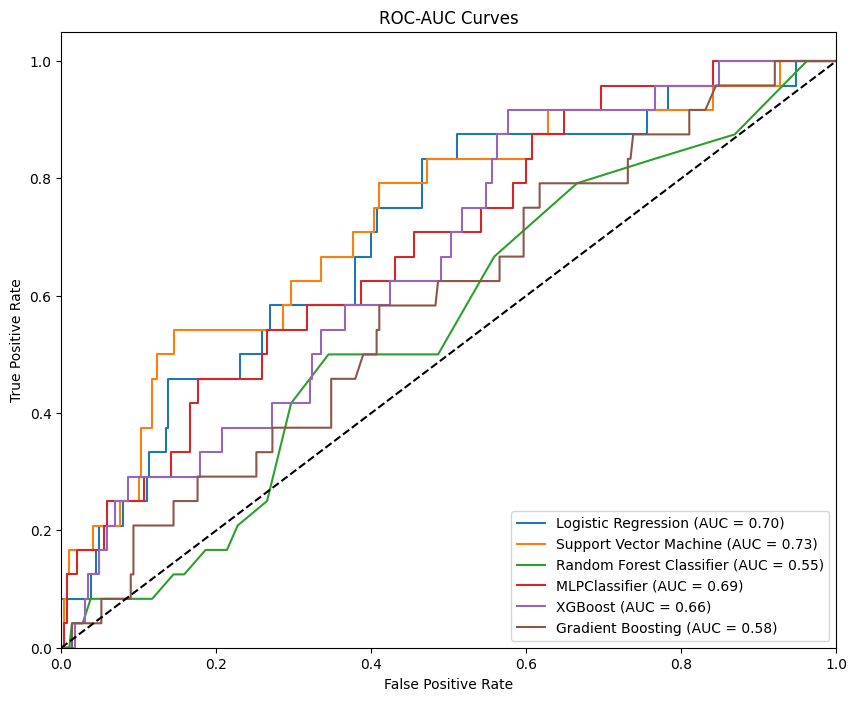

In [ ]:
# Plot ROC-AUC curves
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    y_holdout_pred_prob = model.predict_proba(X_holdout_pca)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_holdout_pca)
    fpr, tpr, _ = roc_curve(y_holdout, y_holdout_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves')
plt.legend(loc="lower right")
plt.show()


                      Model  Train Accuracy  Holdout Accuracy  \
0       Logistic Regression        0.980831          0.869427   
1    Support Vector Machine        0.946752          0.923567   
2  Random Forest Classifier        1.000000          0.923567   
3             MLPClassifier        1.000000          0.923567   
4                   XGBoost        1.000000          0.923567   
5         Gradient Boosting        0.990415          0.910828   

   Holdout Precision  Holdout Recall  Holdout F1 Score  Holdout ROC AUC  \
0           0.881050        0.869427          0.875018         0.704310   
1           0.852976        0.923567          0.886869         0.727730   
2           0.852976        0.923567          0.886869         0.550575   
3           0.898813        0.923567          0.901787         0.685920   
4           0.852976        0.923567          0.886869         0.660920   
5           0.852065        0.910828          0.880467         0.584124   

                  

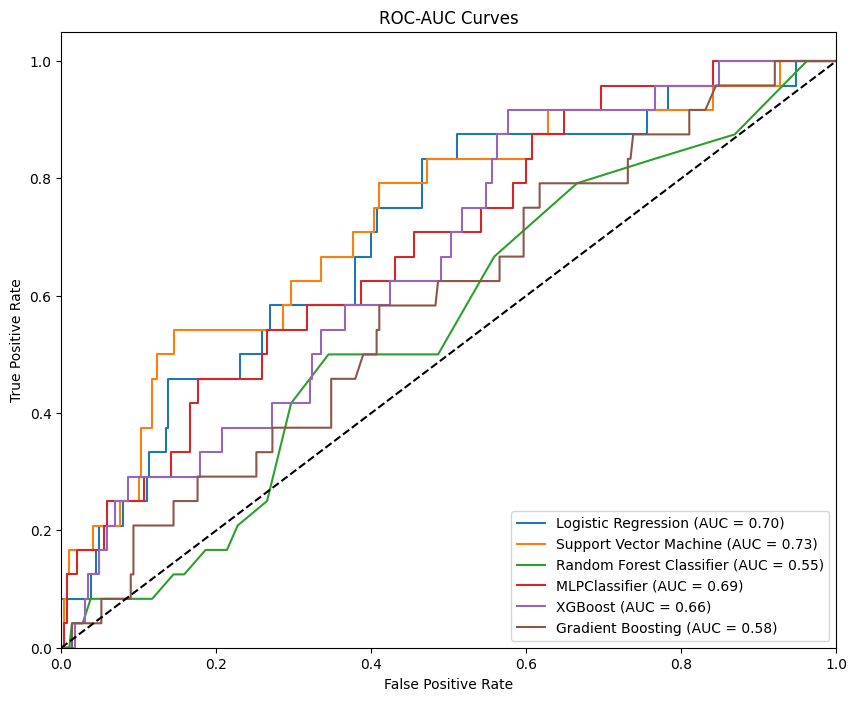

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# List to store the results
results_list = []

# Evaluate each best model and generate classification reports
for model_name, model in models.items():
    # Predictions
    y_train_pred = model.predict(X_train_pca)
    y_holdout_pred = model.predict(X_holdout_pca)
    y_holdout_pred_prob = model.predict_proba(X_holdout_pca)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_holdout_pca)

    # Train metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Holdout metrics
    holdout_accuracy = accuracy_score(y_holdout, y_holdout_pred)
    holdout_precision = precision_score(y_holdout, y_holdout_pred, average='weighted')
    holdout_recall = recall_score(y_holdout, y_holdout_pred, average='weighted')
    holdout_f1 = f1_score(y_holdout, y_holdout_pred, average='weighted')
    holdout_roc_auc = roc_auc_score(y_holdout, y_holdout_pred_prob)

    # Generate classification report for holdout set
    class_report = classification_report(y_holdout, y_holdout_pred, output_dict=True)

    # Append the results to the list
    results_list.append({
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Holdout Accuracy': holdout_accuracy,
        'Holdout Precision': holdout_precision,
        'Holdout Recall': holdout_recall,
        'Holdout F1 Score': holdout_f1,
        'Holdout ROC AUC': holdout_roc_auc,
        'Classification Report': class_report
    })

# Convert the results list to a DataFrame
models_performance_df = pd.DataFrame(results_list)

# Print the performance DataFrame
print(models_performance_df)

# Function to format the classification report for display
def format_classification_report(report_dict):
    report = pd.DataFrame(report_dict).transpose()
    return report

# Display classification reports
for model_result in results_list:
    model_name = model_result['Model']
    class_report = model_result['Classification Report']
    formatted_report = format_classification_report(class_report)
    print(f"Classification Report for {model_name}:\n", formatted_report)
    print("\n")

# Plot ROC-AUC curves
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    y_holdout_pred_prob = model.predict_proba(X_holdout_pca)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_holdout_pca)
    fpr, tpr, _ = roc_curve(y_holdout, y_holdout_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# # Initialize the Random Forest Classifier
# rf = RandomForestClassifier(random_state=42)

# # Perform cross-validation
# cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
# print(f'Cross-validation scores: {cv_scores}')
# print(f'Mean cross-validation score: {np.mean(cv_scores)}')


In [ ]:
# # Define the parameter grid
# param_grid = {
#     'n_estimators': [10,20,50,100],
#     # 'max_depth': [None, 10],
#     # 'min_samples_split': [2],
#     # 'min_samples_leaf': [1],
#     # 'bootstrap': [True, False]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Fit GridSearchCV to the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print(f'Best parameters found: {grid_search.best_params_}')
# print(f'Best cross-validation score: {grid_search.best_score_}')


In [ ]:
# # Get the best model
# best_rf = grid_search.best_estimator_

# # Make predictions on the test set
# y_pred = best_rf.predict(X_test)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Test set accuracy: {accuracy}')


In [ ]:
# from sklearn.metrics import classification_report
# # Make predictions on the test set
# y_pred = best_rf.predict(X_test)
# # Generate the classification report
# report = classification_report(y_test, y_pred)
# print(report)


**NAIVE BAYES**

In [ ]:
# # Initialize the Gaussian Naive Bayes model
# nb = GaussianNB()

# # Train the model
# nb.fit(X_train, y_train)


In [ ]:
# # Make predictions on the test set
# y_pred = nb.predict(X_test)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Test set accuracy: {accuracy}')

# # Generate the classification report
# report = classification_report(y_test, y_pred)
# print(report)


**SVM**

In [ ]:
# from sklearn.svm import LinearSVC

# # Initialize the Support Vector Classifier
# svm = LinearSVC(random_state=42)

# # Train the model
# svm.fit(X_train, y_train)
# # Make predictions on the test set
# y_pred = svm.predict(X_test)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Test set accuracy: {accuracy}')

# # Generate the classification report
# report = classification_report(y_test, y_pred)
# print(report)


**LOGISTIC REGRESSION**

In [ ]:
# from sklearn.linear_model import LogisticRegression
# # Initialize the Logistic Regression model
# log_reg = LogisticRegression(random_state=42, max_iter=1000)

# # Train the model
# log_reg.fit(X_train, y_train)
# # Make predictions on the test set
# y_pred = log_reg.predict(X_test)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Test set accuracy: {accuracy}')

# # Generate the classification report
# report = classification_report(y_test, y_pred)
# print(report)


**KNN**

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# # Initialize the K-Nearest Neighbors model
# knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# # Train the model
# knn.fit(X_train, y_train)
# # Make predictions on the test set
# y_pred = knn.predict(X_test)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Test set accuracy: {accuracy}')

# # Generate the classification report
# report = classification_report(y_test, y_pred)
# print(report)


# # Define the parameter grid
# param_grid = {'n_neighbors': list(range(1, 21))}  # Test values from 1 to 20

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=3, n_jobs=-1)

# # Fit GridSearchCV to the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print(f'Best parameters found: {grid_search.best_params_}')
# print(f'Best cross-validation score: {grid_search.best_score_}')
